In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
import warnings 
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

In [2]:
data= pd.read_excel("SALESDATA.xlsx")

In [3]:
data.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,@dropdown,Unnamed: 21
0,10000460,2017-01-01,158.04,2017-01-01,119156,P01,29071,Nationeel Salted Pretzels,8000,181.44,...,204.84,362.88,59.73,145.11,102.420000,2,154,SE,NaN,U/M = unit of measure
1,10000460,2017-01-01,420.90,2017-01-01,119156,P01,28401,Ebony Prepared Salad,4000,966.44,...,545.54,966.44,278.38,267.16,545.540000,1,154,EA,NaN,NaN
2,10000460,2017-01-01,663.41,2017-01-01,119156,P01,29255,Thresher Spicy Mints,9000,507.75,...,859.84,1523.25,488.68,371.16,286.613333,3,154,EA,NaN,EA = each
3,10000460,2017-01-01,179.45,2017-01-01,119156,P01,36001,Big Time Frozen Cheese Pizza,12000,412.03,...,232.58,412.03,84.23,148.35,232.580000,1,154,EA,NaN,NaN
4,10000460,2017-01-01,1516.52,2017-01-01,119156,P01,47550,Red Spade Turkey Hot Dogs,13000,1160.70,...,1965.58,3482.10,957.15,1008.43,655.193333,3,154,EA,NaN,SE = some SI unit like kgs or gallons


In [4]:
data.tail()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,@dropdown,Unnamed: 21
65277,10026081,2019-12-31,272.5230,2019-12-31,329571,NaN,35009,Better Fancy Canned Sardines,1000,39.1545,...,6540.36,6812.8830,2969.78,3570.58,37.588276,174,154,EA,NaN,NaN
65278,10026081,2019-12-31,548.2520,2019-12-31,329573,NaN,29277,Monarch Spaghetti,1000,40.3128,...,13158.10,13706.3520,6424.27,6733.83,38.700294,340,154,EA,NaN,NaN
65279,10026081,2019-12-31,26.2588,2019-12-31,329575,NaN,19857,Moms Cole Slaw,1000,27.3537,...,630.23,656.4888,421.22,209.01,26.259583,24,154,EA,NaN,NaN
65280,10026081,2019-12-31,447.6400,2019-12-31,329574,NaN,35012,Swell Canned Peaches,1000,14.2560,...,10743.32,11190.9600,6258.02,4485.30,13.685758,785,154,EA,NaN,NaN
65281,10026606,2019-12-31,15.7200,2019-12-31,329580,NaN,37559,Walrus Chardonnay,1000,0.3929,...,377.18,392.9000,340.10,37.08,0.377180,1000,114,EA,NaN,NaN


In [5]:
#Checking Data
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 65282
Number of Columns 22


In [6]:
#Checking Columns
data.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', '@dropdown', 'Unnamed: 21'],
      dtype='object')

In [7]:
#Checking DataType
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

# Data Preprocessing

In [8]:
#Dropping Unwanted Columns
data.drop(['Unnamed: 21','@dropdown'],axis=1,inplace=True)

In [9]:
#Checking Duplicate Values
data[data.duplicated()]

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M


In [10]:
# Converting Invoice Date column in Date Format and Extracting Year,Month and Month_name from 'Invoice Date' column
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Year'] = data['Invoice Date'].dt.year
data['Month'] = data['Invoice Date'].dt.month
data['month_name'] = data['Invoice Date'].dt.month_name()

In [11]:
#Checking Null Values
data.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
Year                                   0
Month                                  0
month_name                             0
dtype: int64

<AxesSubplot:>

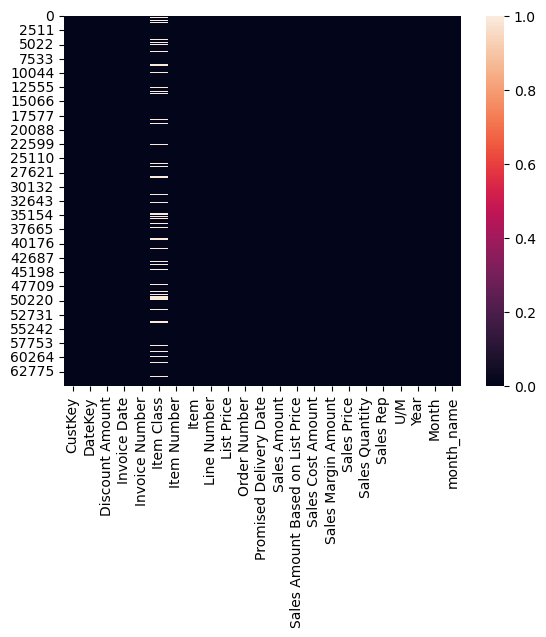

In [12]:
sns.heatmap(data.isnull())  

<AxesSubplot:>

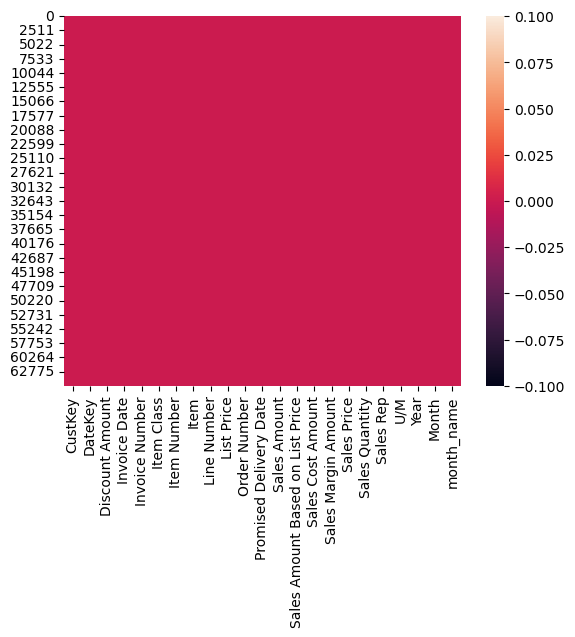

In [13]:
#Handling Null Values
data['Discount Amount']=data['Discount Amount'].fillna(0)
data['Item Class']=data['Item Class'].fillna('NA')
data['Item Number']=data['Item Number'].fillna(0)
data['Sales Price']=data['Sales Price'].fillna(0)
sns.heatmap(data.isnull()) 

In [14]:
#Statistics summary 
data.describe().T.style.background_gradient(cmap='hot')

,count,mean,std,min,25%,50%,75%,max
CustKey,65282.000000,10017702.709997,7176.148147,10000453.000000,10012715.000000,10019665.000000,10023511.000000,10027583.000000
Discount Amount,65282.000000,1855.517987,9037.008289,-255820.800000,246.030000,441.760000,999.760000,343532.660000
Invoice Number,65282.000000,216223.662020,94992.281866,100012.000000,117931.000000,222869.500000,314318.750000,332842.000000
Line Number,65282.000000,23713.849790,32664.024053,1000.000000,3000.000000,12000.000000,32000.000000,344000.000000
List Price,65282.000000,514.693380,449.189182,0.000000,181.560000,325.190000,803.860000,2760.700000
Order Number,65282.000000,180583.064352,67593.871116,100838.000000,115321.000000,203702.000000,218576.000000,321532.000000
Sales Amount,65282.000000,2852.038373,15164.342107,200.010000,308.387500,553.940000,1280.042500,555376.000000
Sales Amount Based on List Price,65282.000000,4707.473613,20696.443785,0.000000,561.040000,998.160000,2315.040000,632610.160000
Sales Cost Amount,65282.000000,1660.979228,9556.485250,0.000000,167.790000,304.500000,687.320000,366576.000000
Sales Margin Amount,65282.000000,1191.059145,5860.787502,-3932.930000,129.950000,246.490000,579.530000,188800.000000


# Sales  By Month and Year 

In [15]:
Monthly_sales = data.groupby([ 'month_name'])['Sales Amount'].sum()
print(Monthly_sales)

month_name
April        12112134.49
August       14590611.40
December     14516466.67
February     20497349.91
January      19471739.54
July         13287585.39
June         15852396.38
March        21714172.68
May          11053298.15
November     13794762.06
October      12829983.51
September    16466268.87
Name: Sales Amount, dtype: float64


In [16]:
Yearly_sales = data.groupby(['Year', ])['Sales Amount'].sum()
print(Yearly_sales)

Year
2017    87462706.40
2018    20817471.00
2019    77906591.65
Name: Sales Amount, dtype: float64


In [17]:
Yearly_monthly_sales = data.groupby(['Year', 'month_name'])['Sales Amount'].sum()
print(Yearly_monthly_sales)

Year  month_name
2017  April         5650871.78
      August        7749377.54
      December      7267346.75
      February      7216327.65
      January       8650450.48
      July          6391727.78
      June          8674182.00
      March         7567525.47
      May           5988694.88
      November      7150974.78
      October       6368884.91
      September     8786342.38
2018  February      6707430.91
      January       7633808.48
      March         6476231.61
2019  April         6461262.71
      August        6841233.86
      December      7249119.92
      February      6573591.35
      January       3187480.58
      July          6895857.61
      June          7178214.38
      March         7670415.60
      May           5064603.27
      November      6643787.28
      October       6461098.60
      September     7679926.49
Name: Sales Amount, dtype: float64


# Analysis on Sales Metrics and Items

In [18]:
Metrics = ['Sales Amount', 'Sales Amount Based on List Price', 'Sales Cost Amount',
                 'Sales Margin Amount', 'Sales Price']
Sales_metrics = data[Metrics].mean().sort_values(ascending=False)
Sales_metrics

Sales Amount Based on List Price    4707.473613
Sales Amount                        2852.038373
Sales Cost Amount                   1660.979228
Sales Margin Amount                 1191.059145
Sales Price                          283.611569
dtype: float64

In [19]:
Most10_item=data['Item'].value_counts().index[0:10]
Most10_item

Index(['Better Fancy Canned Sardines', 'Ebony Prepared Salad',
       'Moms Sliced Turkey', 'Imagine Popsicles', 'Discover Manicotti',
       'Red Spade Foot-Long Hot Dogs', 'High Top Dried Mushrooms',
       'Big Time Frozen Cheese Pizza', 'Cutting Edge Foot-Long Hot Dogs',
       'Bravo Large Canned Shrimp'],
      dtype='object')

In [20]:
Least10_item=data['Item'].value_counts().sort_values().index[0:10]
Least10_item

Index(['High Top Mushrooms', 'Imagine Frozen Cauliflower',
       'Jeffers Corn Puffs', 'Blue Medal Large Brown Eggs', 'Jumbo Large Eggs',
       'Great Bagels', 'Blue Label Canned Tuna in Water', 'Tell Tale Tomatos',
       'Choice Bubble Gum', 'Atomic White Chocolate Bar'],
      dtype='object')

# Sales and Profitability Analysis

In [21]:
#Total sales amount
total_sales_amount = data['Sales Amount'].sum()
print("Total Sales Amount:", total_sales_amount)

Total Sales Amount: 186186769.05


In [22]:
#Total sales quantity
total_sales_quantity = data['Sales Quantity'].sum()
print("Total Sales Quantity:", total_sales_quantity)

Total Sales Quantity: 2943194


In [23]:
# Average sales amount
average_sales_amount = data['Sales Amount'].mean()
print("Average Sales Amount:", average_sales_amount)

Average Sales Amount: 2852.038372751994


In [24]:
# Average sales quantity
average_sales_quantity = data['Sales Quantity'].mean()
print("Average Sales Quantity:", average_sales_quantity)

Average Sales Quantity: 45.084311142428234


In [25]:
# Total sales margin amount
total_sales_margin_amount = data['Sales Margin Amount'].sum()
print("Total Sales Margin Amount:", total_sales_margin_amount)

Total Sales Margin Amount: 77754723.10999998


In [26]:
# Average sales margin amount
average_sales_margin_amount = data['Sales Margin Amount'].mean()
print("Average Sales Margin Amount:", average_sales_margin_amount)

Average Sales Margin Amount: 1191.0591450935942


In [27]:
# Total discount amount
total_discount_amount = sum(data['Discount Amount'])
print("Total Discount Amount:", total_discount_amount)

Total Discount Amount: 121131925.21980117


In [28]:
# Total cost amount
total_cost_amount = sum(data['Sales Cost Amount'])
print("Total Cost Amount:", total_cost_amount)

Total Cost Amount: 108432045.93999815


In [29]:
#Total list price amount
total_list_price_amount = data['List Price'].sum()
print("Total List Price Amount:", total_list_price_amount)

Total List Price Amount: 33600213.2637


In [30]:
#Total profit amount
total_profit_amount = total_sales_margin_amount - total_discount_amount
print("Total Profit Amount:", total_profit_amount)

Total Profit Amount: -43377202.10980119


# Data Visualization

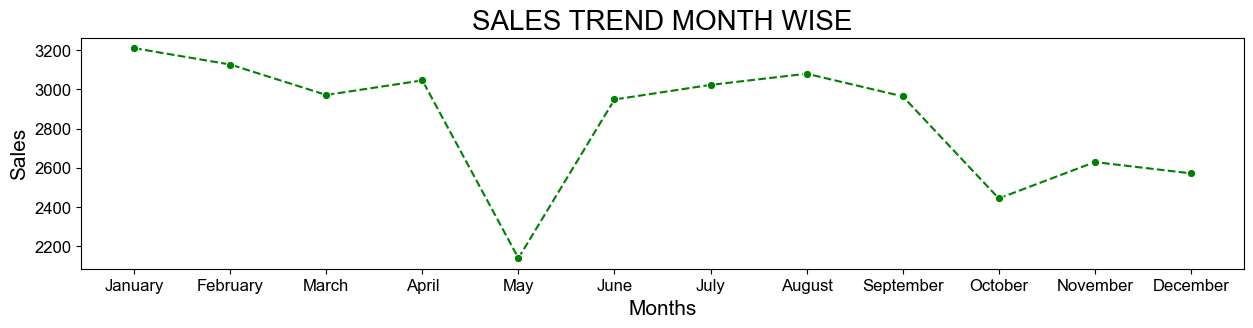

In [31]:
# Line chart for Sales Trend Month Wise
plt.figure(figsize=(15, 3))
sns.lineplot(x='month_name', y='Sales Amount', data=data, ci=None,color='green',linestyle='dashed',marker='o')
plt.xlabel('Months',color='black',size=15)
plt.ylabel('Sales',color='black',size=15)
plt.title('SALES TREND MONTH WISE',color='black',size=20)
plt.xticks(size=12,color='black')
plt.yticks(size=12,color='black')
sns.set_style(style="darkgrid")
plt.show()

<Figure size 500x500 with 0 Axes>

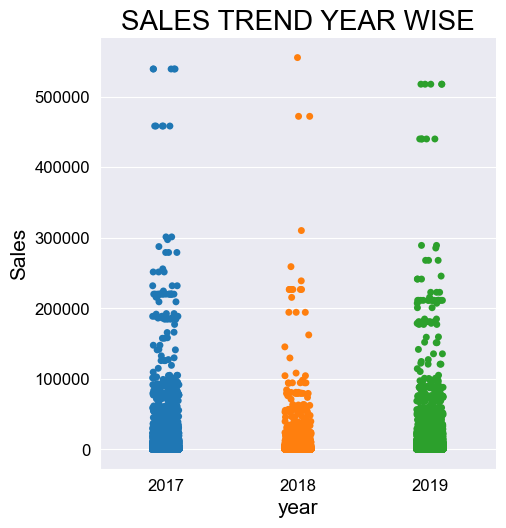

In [32]:
# Catplot for Sales Trend Year Wise
plt.figure(figsize=(5, 5))
sns.catplot(x='Year', y='Sales Amount', data=data)
plt.xlabel('year',color='black',size=15)
plt.ylabel('Sales',color='black',size=15)
plt.title('SALES TREND YEAR WISE',color='black',size=20)
plt.xticks(size=12,color='black')
plt.yticks(size=12,color='black')
sns.set_style(style="darkgrid")
plt.show()

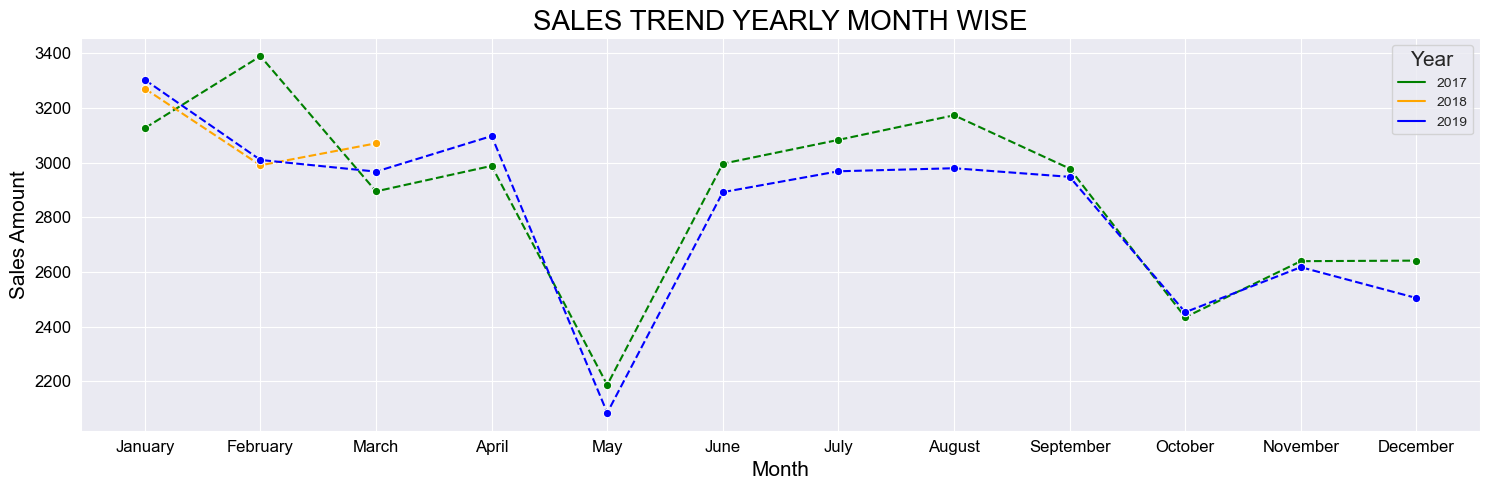

In [33]:
# Line chart for Sales Trend Yearly Month Wise
plt.figure(figsize=(15, 5))
sns.lineplot(x='month_name', y='Sales Amount', hue='Year', data=data, ci=None, linestyle='dashed',
             marker='o',palette=['green', 'orange', 'blue'])
plt.xlabel('Month', color='black', size=15)
plt.ylabel('Sales Amount', color='black', size=15)
plt.title('SALES TREND YEARLY MONTH WISE', color='black', size=20)
plt.legend(title='Year', title_fontsize=15, fontsize=10)
plt.xticks(size=12,color='black')
plt.yticks(size=12,color='black')
plt.tight_layout()
plt.show()

In [34]:
# Creating one more clustered chart of Sales trend yearly_month wise

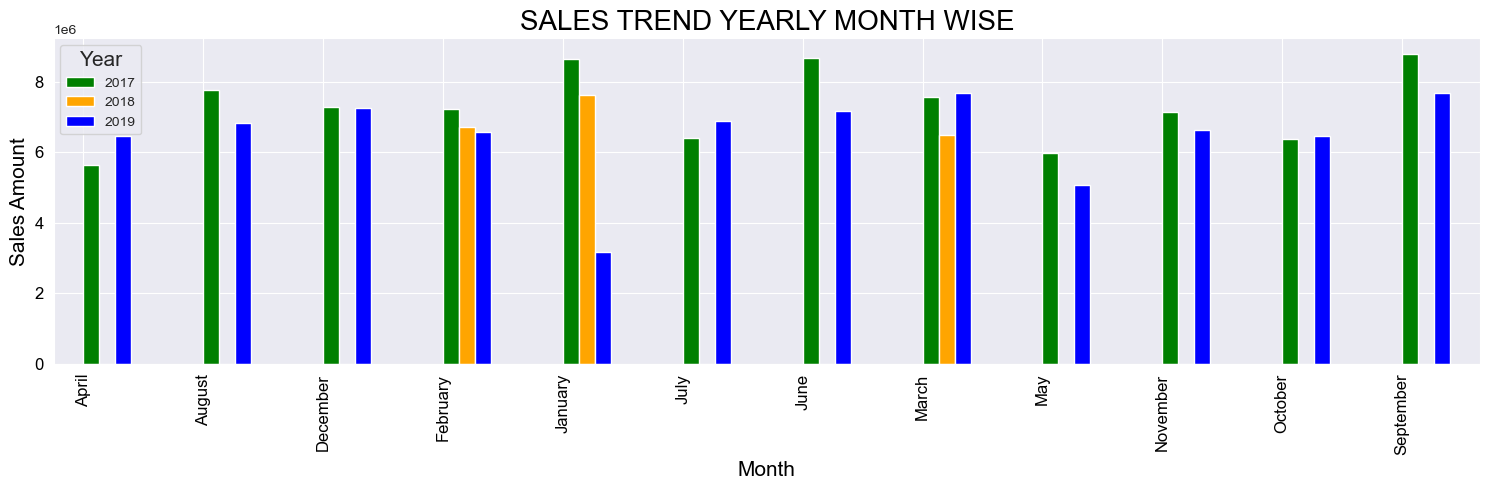

In [35]:
#Analyszing data by pivot table and assigning colors
data_pivot = data.pivot_table(values='Sales Amount', index='month_name', columns='Year', aggfunc='sum')
color = ['green', 'orange', 'blue']
fig, ax = plt.subplots(figsize=(15, 5))
data_pivot.plot(kind='bar', ax=ax, width=0.4, position=0, color=color)
plt.xlabel('Month', color='black', size=15)
plt.ylabel('Sales Amount', color='black', size=15)
plt.title('SALES TREND YEARLY MONTH WISE', color='black', size=20)
plt.legend(title='Year', title_fontsize=15, fontsize=10)
plt.xticks(size=12,color='black')
plt.yticks(size=12,color='black')
plt.tight_layout()
plt.show()

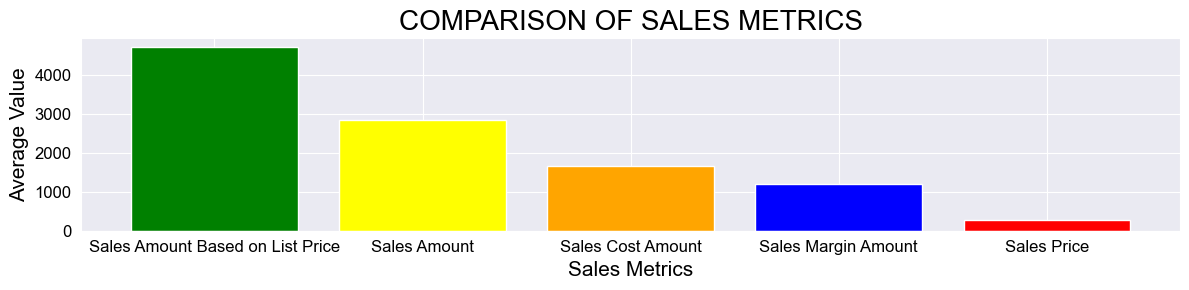

In [36]:
# Column chart for Sales Comparison 

#Data
Metrics = ['Sales Amount', 'Sales Amount Based on List Price', 'Sales Cost Amount',
                 'Sales Margin Amount', 'Sales Price']
Sales_metrics = data[Metrics].mean().sort_values(ascending=False)
#Plot
plt.figure(figsize=(12, 3))
color = ['green', 'yellow','orange', 'blue','red']
plt.bar(Sales_metrics.index,Sales_metrics.values,color =color)
plt.xlabel('Sales Metrics',size =15,color='black')
plt.ylabel('Average Value',size =15,color='black')
plt.title('COMPARISON OF SALES METRICS',size =20,color='black')
plt.xticks(size=12,color='black')
plt.yticks(size=12,color='black')
plt.tight_layout()
plt.show()

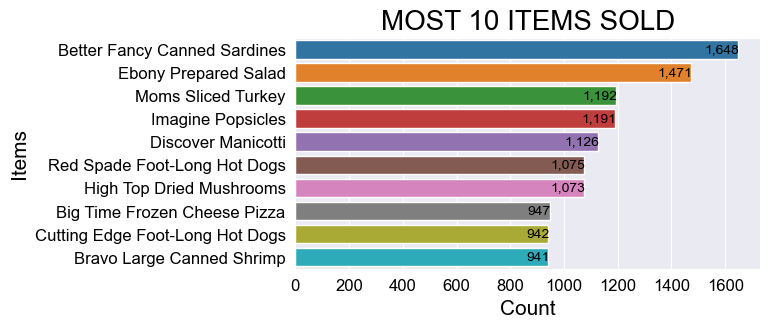

In [37]:
# Bar chart for Items
plt.figure(figsize=(6,3))
ax = sns.countplot(y="Item", data=data, order=data['Item'].value_counts().index[0:10])
plt.title("MOST 10 ITEMS SOLD",size=20,color='black')
plt.ylabel("Items",size =15,color='black')
plt.xlabel("Count",size =15,color='black')
sns.set_style('darkgrid')
plt.xticks(size=12,color='black')
plt.yticks(size=12,color='black')
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    ax.text(width + 5, patch.get_y() + height / 2, f'{int(width):,}', ha='right', va='center', fontsize=10, color='black')
plt.show()

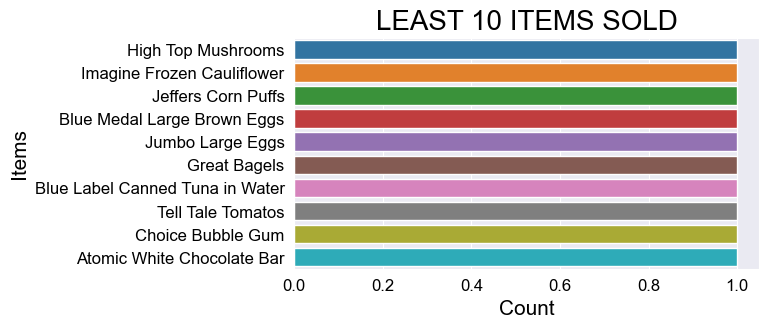

In [38]:
# Bar chart for Items
plt.figure(figsize=(6,3))
ax = sns.countplot(y="Item", data=data, order=data['Item'].value_counts().sort_values().index[0:10])
plt.title("LEAST 10 ITEMS SOLD",size=20,color='black')
plt.ylabel("Items",size =15,color='black')
plt.xlabel("Count",size =15,color='black')
plt.xticks(size=12,color='black')
plt.yticks(size=12,color='black')
sns.set_style('darkgrid')
plt.show()

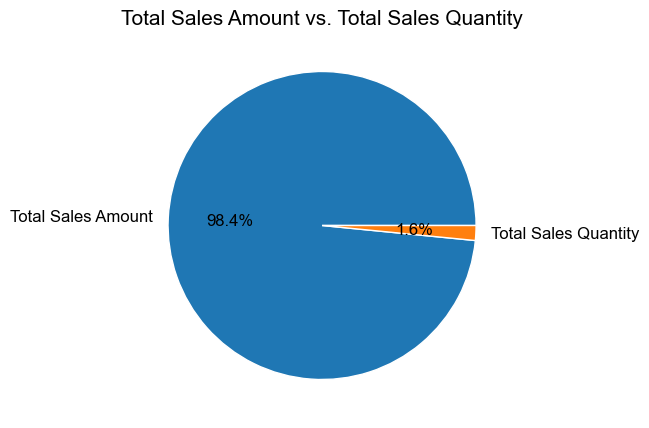

In [39]:
# Pie Chart for Total Sales Amount and Total Sales Quantity

#Data
labels = ['Total Sales Amount', 'Total Sales Quantity']
values = [total_sales_amount, total_sales_quantity]
#Plot
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 12, 'color': 'black'})
plt.title('Total Sales Amount vs. Total Sales Quantity',size=15,color='black')
plt.show()

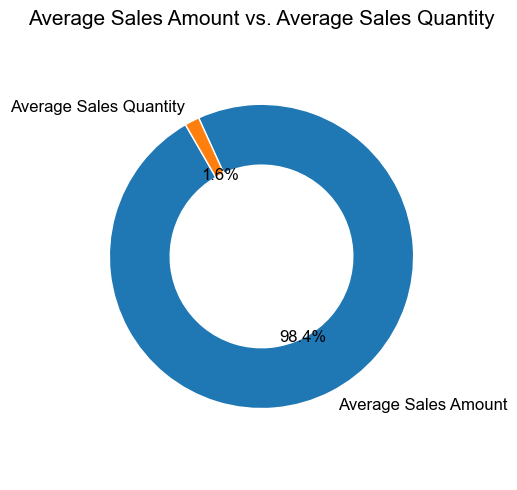

In [40]:
# Donut Chart for Average Sales Amount and Average Sales Quantity

#Data 
categories = ['Average Sales Amount', 'Average Sales Quantity']
values = [average_sales_amount, average_sales_quantity]
#Plot
plt.figure(figsize=(5, 5))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=120, wedgeprops=dict(width=0.4),
        textprops=dict(size=12, color='black'))
centre_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Average Sales Amount vs. Average Sales Quantity',size=15,color='black')
plt.axis('equal')  
plt.tight_layout()
plt.show()

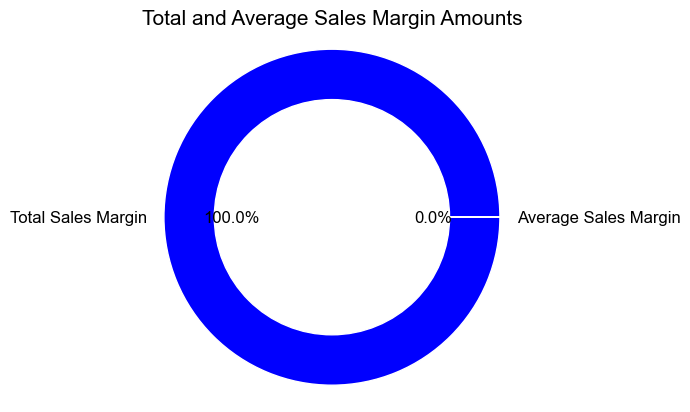

In [41]:
# Donut Chart for Total Sales Margin and Average Sales Margin

#Data 
categories = ['Total Sales Margin', 'Average Sales Margin']
values = [total_sales_margin_amount, average_sales_margin_amount]
#Plot
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['blue', 'green'], startangle=0,
        textprops=dict(size=12, color='black'))
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Total and Average Sales Margin Amounts',size=15,color='black')
plt.axis('equal')
plt.show()

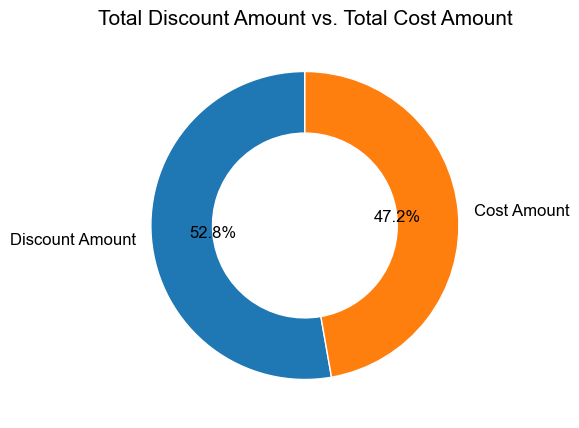

In [42]:
# Donut Chart for Discount Amount and Cost Amount

#Data 
categories = ['Discount Amount', 'Cost Amount']
values = [total_discount_amount, total_cost_amount]
#Plot
plt.figure(figsize=(5, 5))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4),
        textprops=dict(size=12, color='black'))
centre_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Total Discount Amount vs. Total Cost Amount',size=15,color='black')
plt.show()

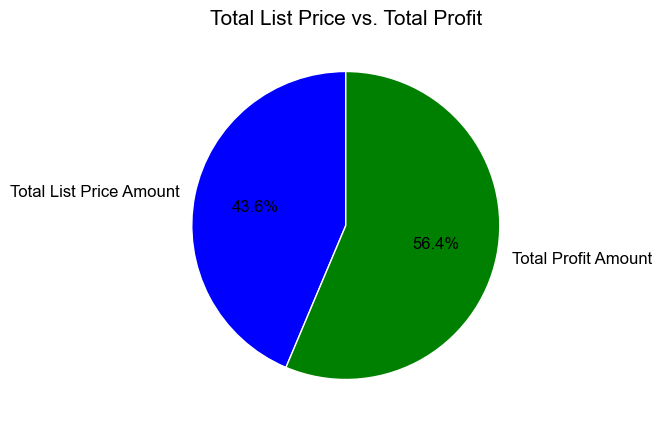

In [43]:
# Pie chart for Total List Price Amount and Total Profit Amount

#Data
categories = ['Total List Price Amount', 'Total Profit Amount']
values = [abs(total_list_price_amount), abs(total_profit_amount)]
#for negative values
if any(val < 0 for val in values):
    raise ValueError("Values must be non-negative for a pie chart.")
#Plot
plt.figure(figsize=(5, 5))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['blue', 'green'], startangle=90,
        textprops={'fontsize': 12, 'color': 'black'})
plt.title('Total List Price vs. Total Profit', size=15, color='black')
plt.show()

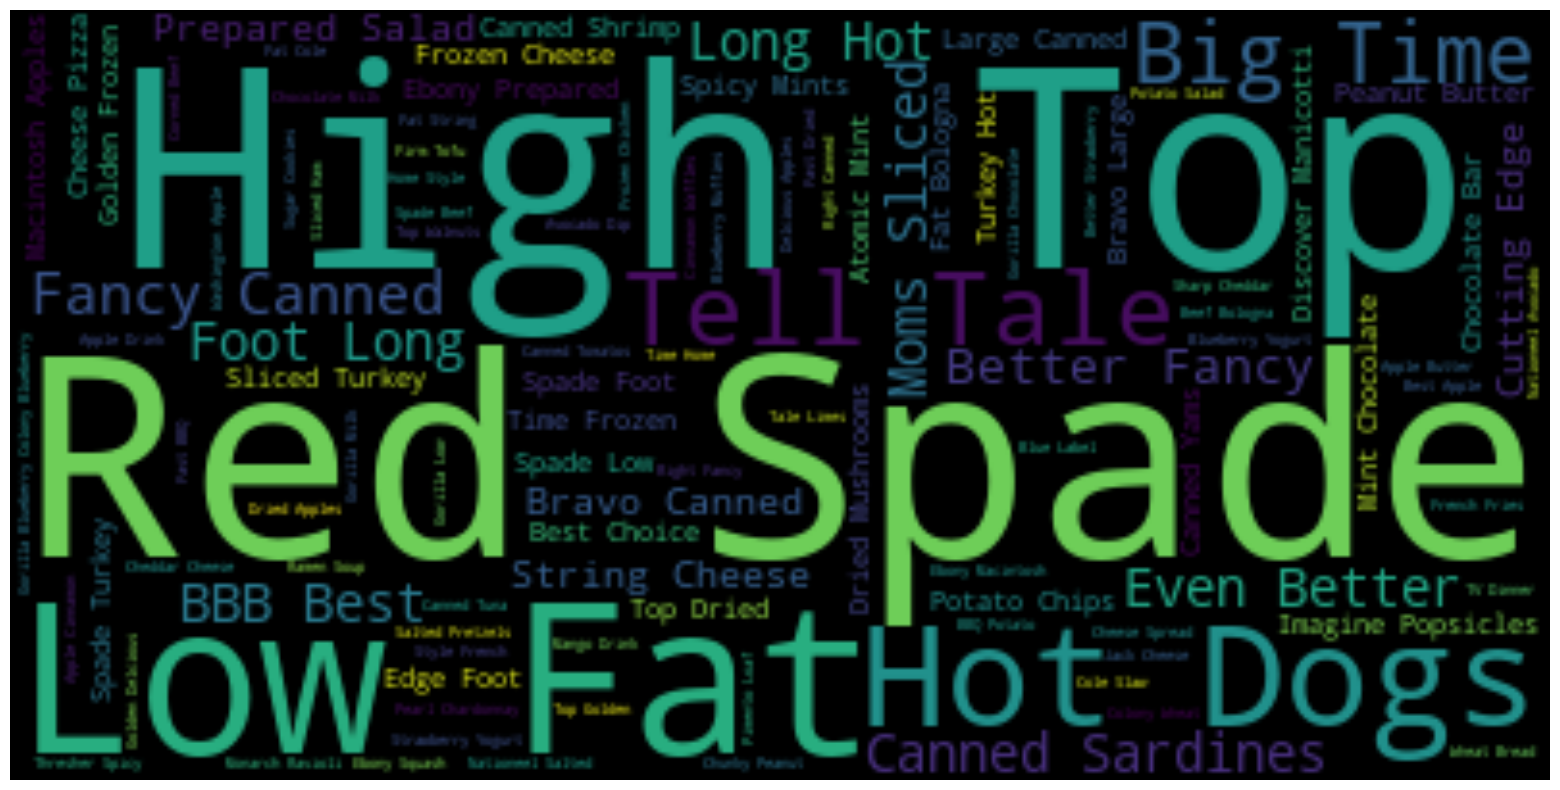

In [44]:
#Products
product_data = ' '.join(data['Item'])
wordcloud = WordCloud().generate(product_data)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()